In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('output.csv', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,��😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
24058,แม่งควายล้วนนน,neg
24059,ดอยสุเทพน้องง ไปหมดแล้วววว #pm25,neg
24060,ค่าชุดอาจจะแพงกว่าส่วนลด,neg
24061,รัฐต้องการแค่ภาษีครับ,neu


<Axes: xlabel='sentiment'>

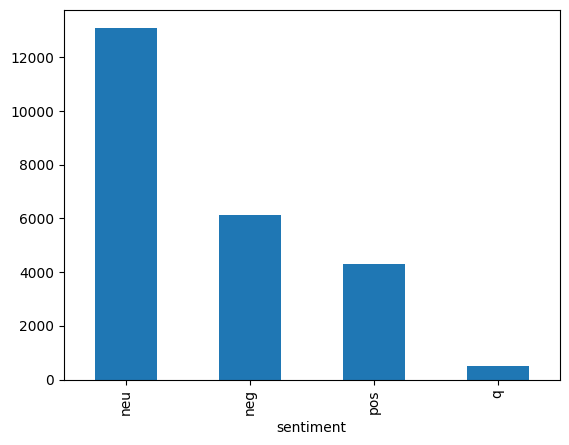

In [12]:
df['sentiment'].value_counts().plot.bar()

In [13]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ล้วนจน',
 'พยายาม',
 'ทําให้',
 'ให้แด่',
 'เขา',
 'ประสบ',
 'ยังคง',
 'พวกคุณ',
 'วัน',
 'แค่',
 'ที่ละ',
 'ทุกคน',
 'ในที่',
 'สบาย',
 'วันไหน',
 'กับ',
 'อันที่',
 'บาง',
 'หาความ',
 'คราหนึ่ง',
 'ทีเดียว',
 'หนึ่ง',
 'อาจจะ',
 'เสร็จ',
 'แท้จริง',
 'หาก',
 'นาน',
 'เยอะแยะ',
 'จด',
 'พวก',
 'ที่นั้น',
 'พร้อมด้วย',
 'ค่ะ',
 'ไม่ค่อยจะ',
 'คุณๆ',
 'ตลอดมา',
 'ประการใด',
 'รวด',
 'ให้ดี',
 'ส่วนมาก',
 'ที่แห่งนั้น',
 'เช่นกัน',
 'ที่',
 'เร็วๆ',
 'ต่าง',
 'สิ่งนั้น',
 'พวกโน้น',
 'เปลี่ยน',
 'เป็นอันๆ',
 'ยิ่งเมื่อ',
 'เปลี่ยนแปลง',
 'ภายหลัง',
 'ระยะ',
 'น้อยๆ',
 'ถึงบัดนี้',
 'ถึงแก่',
 'ตลอดศก',
 'แต่นั้น',
 'เรียก',
 'จวน',
 'หมด',
 'ขณะที่',
 'นอก',
 'ภายใต้',
 'ที่จริง',
 'หรือไม่',
 'เกินๆ',
 'รับรอง',
 'บัดนั้น',
 'ณ',
 'ยกให้',
 'บอกว่า',
 'อย่างละ',
 'แต่ต้อง',
 'ตรงๆ',
 'จนกว่า',
 'ให้มา',
 'รับ',
 'แต่ทว่า',
 'จัดทำ',
 'แต่จะ',
 'บางครั้ง',
 'เพียงเพราะ',
 'เนี่ย',
 'มั้ยนั่น',
 'จ๊ะ',
 'เมื่อเย็น',
 'นอกเหนือจาก',
 'ด้วยประการฉะนี้',
 'ดั่งกับว่า',
 'ช่วงๆ',
 'ผ่าน',
 

In [14]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu,ประเทศ เรา ผลิต และ ส่งออก ยาสูบ เยอะ สุด ใน โ...
1,คะ,neu,คะ
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg,อิ เหี้ย ออม ทำ กู อยาก กิน เอ็ม เค
3,��😅😅,neu,��😅😅
4,สวัสดีวันพุธ แนน อะไรนะ,neu,สวัสดี วัน พุธ แนน อะไร นะ
...,...,...,...
24058,แม่งควายล้วนนน,neg,แม่ ง ควาย ล้วน นน
24059,ดอยสุเทพน้องง ไปหมดแล้วววว #pm25,neg,ดอย สุเทพ น้อง ง ไป หมด แล้ว ววว pm 25
24060,ค่าชุดอาจจะแพงกว่าส่วนลด,neg,ค่า ชุด อาจจะ แพง กว่า ส่วนลด
24061,รัฐต้องการแค่ภาษีครับ,neu,รัฐ ต้องการ แค่ ภาษี ครับ


In [16]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'ซิ': 11549,
 'ส': 17917,
 'คะ': 10369,
 'สงกรานต์': 17946,
 'นี้': 13631,
 'ขน': 9541,
 'ตา': 12322,
 'กับ': 9100,
 'อาย': 19755,
 'ไลน์': 24269,
 'เนอร์': 21144,
 'ต้อง': 12596,
 'กันน้ำ': 9089,
 'ด้วย': 11995,
 'นะค้า': 13435,
 'าาา': 20160,
 'ใคร': 23879,
 'ยัง': 16230,
 'ไม่': 24222,
 'มี': 15969,
 'เซ็ท': 20819,
 'เลย': 21934,
 'ค๊าาา': 10645,
 '😘': 25166,
 '-': 128,
 'เมย์': 21703,
 'เบล': 21240,
 'ลี': 17288,
 'น': 13320,
 'วอ': 17552,
 'ล': 17057,
 'ลุ่ม': 17322,
 'เอ็กซ์เพรส': 22517,
 'ไฮเปอร์': 24354,
 'เคิร์ล': 20509,
 'มาสคาร่า': 15904,
 'ล็อค': 17386,
 'หนา': 18873,
 'งอน': 10688,
 'ติด': 12399,
 'ทน': 12774,
 '24': 681,
 'ชม': 11194,
 '>>>': 1276,
 'สั่งซื้อ': 18382,
 'คลิก': 10083,
 'https': 7006,
 '//': 213,
 'bitly': 6187,
 '/': 210,
 '2': 585,
 'JEfN': 3299,
 '3': 770,
 'I': 3162,
 'กล': 8927,
 'อส': 19570,
 'ซี่': 11586,
 'ไลเนอร์': 24276,
 'นาน': 13535,
 'ซื้อ': 11610,
 'ที่': 13095,
 'GSwDxR': 2841,
 'เม': 21685,
 'ย': 16138,
 'เดอะ': 20865,
 'ฟอล์ส': 15477,
 'พุ

In [20]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

,,$,%,%(,%),%*,%=,%”,&,',...,🥛,🥜🥜,🦁,🦄,🦏,🦐🦐,🦕,🧐,🧚🏼‍♀️🧚🏼‍♀️,🧡
text_tokens,,,,,,,,,,,,,,,,,,,,,
ซิ ส คะ ซิ ส สงกรานต์ นี้ ขน ตา กับ อาย ไลน์ เนอร์ ต้อง กันน้ำ ด้วย นะค้า าาา ใคร ยัง ไม่ มี ต้อง เซ็ท กันน้ำ นี้ เลย ค๊าาา 😘 - เมย์ เบล ลี น วอ ล ลุ่ม เอ็กซ์เพรส ไฮเปอร์ เคิร์ล มาสคาร่า ล็อค ขน ตา หนา งอน ติด ทน 24 ชม กันน้ำ >>> สั่งซื้อ คลิก https // bitly / 2 JEfN 3 I - เมย์ เบล ลี น ไฮเปอร์ กล อส ซี่ อาย ไลเนอร์ ติด ทน นาน 24 ชม >>> คลิก ซื้อ ที่ https // bitly / 2 GSwDxR - เม ย เบล ลี น เดอะ ฟอล์ส ซี่ พุ ช อัพ แอ งเจิล มาสคาร่า ขน ตา หนา งอน เฉี่ยว >>> สั่งซื้อ https // bitly / 2 GOiduF - เม ย เบล ลี น เดอะ ฟอล์ส ซี่ พุ ช อัพ มาสคาร่า เพื่อ ขน ตา หนา งอน เด้ง ไม่ ง้อ ขน ตา ปลอม >>> ช้อป เลย https // bitly / 2 ECFvSf จะ สาด ยังไง ก็ ไม่ พัง ปัง เว่อ สงกรานต์ นี้ จะ ยอมให้ พัง ไม่ ได้ นะ ยู ววว MaybellineThailand อยาก โดน สาด ดดดด,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ใช้ สิทธิ ได้ ครั้ง เดียว หรือ คะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แพง ไป หน่อย นะ ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
กิน ลูกชิ้น ปิ้ง ข้างทาง ไม้ ละ 20 บาท ละ กัน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
วันก่อน กินที่ เซ นท รัล ระยอง ไก่ ก็ ออ กก ลิ าน รุนแรง,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
น่ากิน นน อ่ะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ตัง ไม่ มี 😭😭😭,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
จัด ไหม ล่ะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.63      0.75      0.68      1571
         neu       0.85      0.71      0.77      4685
         pos       0.39      0.55      0.46       895
           q       0.18      0.40      0.24        68

    accuracy                           0.70      7219
   macro avg       0.51      0.60      0.54      7219
weighted avg       0.74      0.70      0.71      7219



In [25]:
my_text = 'ผมรู้สึกปวดขา'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['pos'], dtype=object)